# 머신러닝

In [1]:
import pandas as pd
import numpy as np
import re
import scipy as super
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [11]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [13]:
# 전력 유가 환율 데이터 불러오기
df = pd.read_csv("찐유가_전력_환율_전처리.csv")
df

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [7]:
df.set_index('날짜', inplace=True)
df

,두바이_유가,전력_가격,환율
날짜,,,
2022-01-01,77.03,125.0,1185.5
2022-01-02,77.03,114.0,1185.5
2022-01-03,77.03,151.0,1185.5
2022-01-04,78.03,162.0,1190.8
2022-01-05,78.81,161.0,1194.3
...,...,...,...
2022-10-29,91.11,242.0,1418.1
2022-10-30,91.11,229.0,1418.1
2022-10-31,91.13,244.0,1419.3


In [17]:
x_data = df[['두바이_유가', '환율']]
x_data

,두바이_유가,환율
0,77.03,1185.5
1,77.03,1185.5
2,77.03,1185.5
3,78.03,1190.8
4,78.81,1194.3
...,...,...
301,91.11,1418.1
302,91.11,1418.1
303,91.13,1419.3
304,91.22,1422.2


In [18]:
y_data = df[['전력_가격']]
y_data

,전력_가격
0,125.0
1,114.0
2,151.0
3,162.0
4,161.0
...,...
301,242.0
302,229.0
303,244.0
304,255.0


## 시계열 예측 ARIMA

### 전력 가격 예측하기

In [35]:
df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      306 non-null    datetime64[ns]
 1   두바이_유가  306 non-null    float64       
 2   전력_가격   306 non-null    float64       
 3   환율      306 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.7 KB


In [36]:
#전력 가격만 뽑아오기
elec_price = df[['날짜', '전력_가격']]
elec_price

,날짜,전력_가격
0,2022-01-01,125.0
1,2022-01-02,114.0
2,2022-01-03,151.0
3,2022-01-04,162.0
4,2022-01-05,161.0
...,...,...
301,2022-10-29,242.0
302,2022-10-30,229.0
303,2022-10-31,244.0
304,2022-11-01,255.0


In [37]:
#날짜를 인덱스화
elec_price.set_index('날짜', inplace=True)
elec_price

,전력_가격
날짜,
2022-01-01,125.0
2022-01-02,114.0
2022-01-03,151.0
2022-01-04,162.0
2022-01-05,161.0
...,...
2022-10-29,242.0
2022-10-30,229.0
2022-10-31,244.0


In [38]:
elec_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2022-01-01 to 2022-11-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전력_가격   306 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [39]:
#전력가격 int -> float 형 변환
elec_price = elec_price.astype(float)
elec_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2022-01-01 to 2022-11-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전력_가격   306 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [40]:
#마지막 인덱스값 확인
elec_price.index[-1]

Timestamp('2022-11-02 00:00:00')

In [41]:
# 9일 값 예측 날짜 인덱스 df 만들기
index_9_days = pd.date_range(elec_price.index[-1], freq='D', periods=10, tz=None)
index_9_days

DatetimeIndex(['2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
               '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09',
               '2022-11-10', '2022-11-11'],
              dtype='datetime64[ns]', freq='D')

### 미래 전력 가격 불러오기 (11월)

In [42]:
nov_price = pd.read_excel('전력 일별 가격(11월).xlsx')
nov_price.head()

,날짜,전력_가격
0,2022-11-01,평균 255.26 원/kWh
1,2022-11-02,평균 255.84 원/kWh
2,2022-11-03,평균 261.21 원/kWh
3,2022-11-04,평균 254.99 원/kWh
4,2022-11-05,평균 238.68 원/kWh


#### 11월 전력 데이터 전처리

In [43]:
#전력 가격에서 숫자만 추출하기
nov_price['전력가격'] = nov_price['전력_가격'].str.extract(r'(\d+)')
nov_price.head()

,날짜,전력_가격,전력가격
0,2022-11-01,평균 255.26 원/kWh,255
1,2022-11-02,평균 255.84 원/kWh,255
2,2022-11-03,평균 261.21 원/kWh,261
3,2022-11-04,평균 254.99 원/kWh,254
4,2022-11-05,평균 238.68 원/kWh,238


In [44]:
nov_price = nov_price[['날짜','전력가격']]
nov_price

,날짜,전력가격
0,2022-11-01,255
1,2022-11-02,255
2,2022-11-03,261
3,2022-11-04,254
4,2022-11-05,238
5,2022-11-06,183
6,2022-11-07,242
7,2022-11-08,251
8,2022-11-09,NaN
9,2022-11-10,258


In [45]:
nov_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      24 non-null     datetime64[ns]
 1   전력가격    23 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 512.0+ bytes


In [46]:
#11.1 ~ 11.9 데이터만 추출
cur_elec_price = nov_price[nov_price['날짜'].between('2022-11-01', '2022-11-10')]
cur_elec_price

,날짜,전력가격
0,2022-11-01,255
1,2022-11-02,255
2,2022-11-03,261
3,2022-11-04,254
4,2022-11-05,238
5,2022-11-06,183
6,2022-11-07,242
7,2022-11-08,251
8,2022-11-09,NaN
9,2022-11-10,258


In [47]:
#결측값 채우기
cur_elec_price = cur_elec_price.fillna(method='ffill')
cur_elec_price

,날짜,전력가격
0,2022-11-01,255
1,2022-11-02,255
2,2022-11-03,261
3,2022-11-04,254
4,2022-11-05,238
5,2022-11-06,183
6,2022-11-07,242
7,2022-11-08,251
8,2022-11-09,251
9,2022-11-10,258


In [48]:
cur1_elec_price = cur_elec_price.groupby(["날짜"])['전력가격'].mean().round().to_frame()
cur1_elec_price = cur1_elec_price.rename(columns={'전력가격':'실제 전력가격'})
cur1_elec_price

,실제 전력가격
날짜,
2022-11-01,255.0
2022-11-02,255.0
2022-11-03,261.0
2022-11-04,254.0
2022-11-05,238.0
2022-11-06,183.0
2022-11-07,242.0
2022-11-08,251.0
2022-11-09,251.0


### ARIMA 예측값 시각화

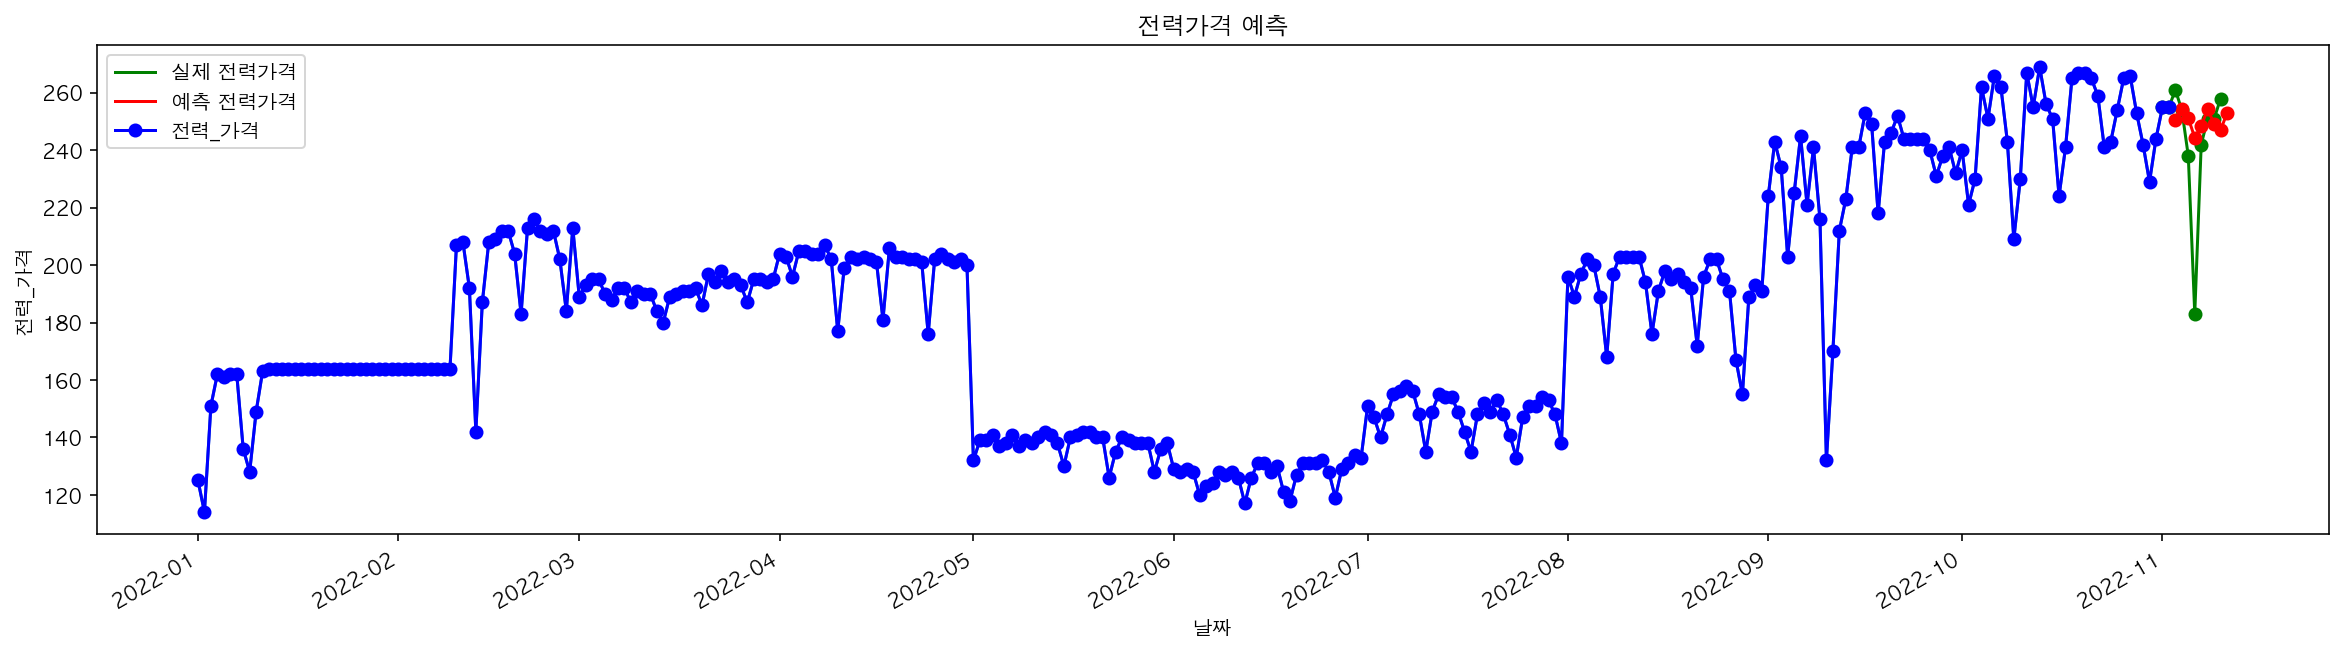

In [49]:
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
auto_arima_model = pm.auto_arima(elec_price, seasonal=False, m=1)

# 모델 예측
fcast2 = auto_arima_model.predict(9) 
fcast2 = pd.Series(fcast2, index=index_9_days)
fcast2 = fcast2.rename("예측 전력가격")

# 예측값 시각화
fig, ax = plt.subplots(figsize=(20,5))
chart = sns.lineplot(x='날짜', y='전력_가격', data = elec_price)
chart.set_title('전력가격 예측')
cur1_elec_price.plot(ax=ax, color='green', marker="o", legend=True)
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
elec_price.plot(ax=ax, color='blue', marker="o", legend=True)
plt.show()

In [50]:
#예측한 데이터
fcast2

2022-11-02           NaN
2022-11-03    250.672936
2022-11-04    254.513769
2022-11-05    251.170765
2022-11-06    244.396036
2022-11-07    248.585941
2022-11-08    254.202898
2022-11-09    249.264228
2022-11-10    247.013353
2022-11-11    253.006447
Freq: D, Name: 예측 전력가격, dtype: float64

In [51]:
#예측 데이터 데이터 프레임 형식으로 변환
prd1_elec_price = pd.DataFrame(fcast2)
prd1_elec_price

,예측 전력가격
2022-11-02,NaN
2022-11-03,250.672936
2022-11-04,254.513769
2022-11-05,251.170765
2022-11-06,244.396036
2022-11-07,248.585941
2022-11-08,254.202898
2022-11-09,249.264228
2022-11-10,247.013353
2022-11-11,253.006447


결과값이 좋지 않아 선형 회귀를 사용하기로 함

---------------------

#  릿지 회귀 분석

< 릿지 회귀 >

릿지(Ridge)도 회귀를 위한 선형모델이다. 

하지만 릿지 회귀에서의 가중치(w) 선택은 훈련데이터를 잘 예측하기 위해서 뿐만 아니라 제약 조건을 만족시키기 위한 목적도 있다. 가중치의 절댓값을 가능한 한 작게 만드는 것이다.



마시 말해 w의 모든 원소가 0에 가깝게 되길 원한다.

이런 제약을 규제라고한다.

규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.

릿지 회귀에 사용하는 규제 방식을 L2규제라고 한다.

[출처] [파이썬][머신러닝][회귀][Ridge] 릿지 회귀 모델 |작성자 하쿠나마타타



### 1. 데이터 가져오기

#### Ridge
- 훈련 세트의 정확도 : 0.87
- 테스트 세트의 정확도 : 0.81


#### LinearRegression
- 훈련 세트의 정확도 : 0.94
- 테스트 세트의 정확도 : 0.79

LinearRegression에 비해 훈련 세트에서는 점수가 낮지만  테스트 세트에 대한 점수는 더 높다.

선형 회귀는 이 데이터 셋에서 과대적합되지만 Ridge는 덜 자유로운 모델이기에 과대적합이 적어진다.

모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다.

우리가 관심있는것은 훈련 세트가 아닌 테스트 세트이므로 Ridge 모델을 선택해야 한다.
[출처] [파이썬][머신러닝][회귀][Ridge] 릿지 회귀 모델 |작성자 하쿠나마타타

--------------

### 다중 선형 회귀와 릿지 회귀 간단한 비교

### ㅇㅅㅇ

In [59]:
#전력 가격만 뽑아오기
price = df[['날짜', '두바이_유가', '전력_가격']]
price

,날짜,두바이_유가,전력_가격
0,2022-01-01,77.03,125.0
1,2022-01-02,77.03,114.0
2,2022-01-03,77.03,151.0
3,2022-01-04,78.03,162.0
4,2022-01-05,78.81,161.0
...,...,...,...
301,2022-10-29,91.11,242.0
302,2022-10-30,91.11,229.0
303,2022-10-31,91.13,244.0
304,2022-11-01,91.22,255.0


In [60]:
#price.set_index('날짜', inplace=True)
#price

In [61]:
price.index[-1]

305

In [62]:
# 9일 값 예측 날짜 인덱스 df 만들기
index_9_days = pd.date_range(price.index[-1], freq='D', periods=10, tz=None)
index_9_days

DatetimeIndex(['1970-01-01 00:00:00.000000305',
               '1970-01-02 00:00:00.000000305',
               '1970-01-03 00:00:00.000000305',
               '1970-01-04 00:00:00.000000305',
               '1970-01-05 00:00:00.000000305',
               '1970-01-06 00:00:00.000000305',
               '1970-01-07 00:00:00.000000305',
               '1970-01-08 00:00:00.000000305',
               '1970-01-09 00:00:00.000000305',
               '1970-01-10 00:00:00.000000305'],
              dtype='datetime64[ns]', freq='D')

In [63]:
nov_oil_price = pd.read_excel('두바이 유가(11월).xlsx')
nov_oil_price.head()

,날짜,종가
0,2022-11-01,91.22
1,2022-11-02,91.87
2,2022-11-03,89.50
3,2022-11-04,93.63
4,2022-11-07,92.68


In [64]:
nov_oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      15 non-null     datetime64[ns]
 1   종가      15 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 368.0 bytes


In [65]:
#11.1 ~ 11.9 데이터만 추출
cur_oil_price = nov_oil_price[nov_oil_price['날짜'].between('2022-11-01', '2022-11-10')]
cur_oil_price

,날짜,종가
0,2022-11-01,91.22
1,2022-11-02,91.87
2,2022-11-03,89.50
3,2022-11-04,93.63
4,2022-11-07,92.68
5,2022-11-08,90.62
6,2022-11-09,88.80
7,2022-11-10,89.36


In [66]:
cur2_oil_price = cur_oil_price.groupby(["날짜"])['종가'].mean().round().to_frame()
cur2_oil_price = cur2_oil_price.rename(columns={'종가' : '실제 유가'})
cur2_oil_price

,실제 유가
날짜,
2022-11-01,91.0
2022-11-02,92.0
2022-11-03,90.0
2022-11-04,94.0
2022-11-07,93.0
2022-11-08,91.0
2022-11-09,89.0
2022-11-10,89.0


In [67]:
cur3_oil_price = pd.merge(cur1_elec_price, cur2_oil_price, how='inner', left_index=True, right_index=True)
cur3_oil_price

,실제 전력가격,실제 유가
날짜,,
2022-11-01,255.0,91.0
2022-11-02,255.0,92.0
2022-11-03,261.0,90.0
2022-11-04,254.0,94.0
2022-11-07,242.0,93.0
2022-11-08,251.0,91.0
2022-11-09,251.0,89.0
2022-11-10,258.0,89.0


In [68]:
#cur3_oil_price.reset_index(level=0, inplace=True)
#cur3_oil_price

In [69]:
#데이터 내보내기
#cur3_oil_price.to_csv('test.csv', encoding='utf-8', index=False)

In [70]:
test = pd.read_csv('test.csv')
test

,날짜,실제 전력가격,실제 유가
0,2022-11-01,NaN,NaN
1,2022-11-02,NaN,NaN
2,2022-11-03,NaN,NaN
3,2022-11-04,NaN,NaN
4,2022-11-07,NaN,NaN
5,2022-11-08,NaN,NaN
6,2022-11-09,NaN,NaN
7,2022-11-10,NaN,NaN


In [71]:
price

,날짜,두바이_유가,전력_가격
0,2022-01-01,77.03,125.0
1,2022-01-02,77.03,114.0
2,2022-01-03,77.03,151.0
3,2022-01-04,78.03,162.0
4,2022-01-05,78.81,161.0
...,...,...,...
301,2022-10-29,91.11,242.0
302,2022-10-30,91.11,229.0
303,2022-10-31,91.13,244.0
304,2022-11-01,91.22,255.0
